# Import Library & Data

In [11]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [12]:
import os 
os.chdir(r"C:\Users\ANKIT") 

In [13]:
# importing or loading the dataset 
Data_for_PCA = pd.read_csv('Clean_Data.csv')

In [14]:
Data_for_PCA.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796,5250,10703,1659,1961,Open,CAT B,530,6649000
1,8294,8186,12694,1461,1752,Not Provided,CAT B,210,3982000
2,11001,14399,16991,1340,1609,Not Provided,CAT A,720,5401000
3,8301,11188,12289,1451,1748,Covered,CAT B,620,5373000
4,10510,12629,13921,1770,2111,Not Provided,CAT B,450,4662000


## Taking specific column for Analysis

In [15]:
numeric_predictors=['Dist_Taxi','Dist_Market','Dist_Hospital','Carpet','Builtup','Rainfall','City_Category']
dataset = Data_for_PCA[numeric_predictors]

In [16]:
dataset.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,City_Category
0,9796,5250,10703,1659,1961,530,CAT B
1,8294,8186,12694,1461,1752,210,CAT B
2,11001,14399,16991,1340,1609,720,CAT A
3,8301,11188,12289,1451,1748,620,CAT B
4,10510,12629,13921,1770,2111,450,CAT B


## Data Partition

In [25]:
# define our input variable (X) & output variable
X = dataset.drop('City_Category', axis = 1)
Y = dataset[['City_Category']]


In [27]:
Y

,City_Category
0,CAT B
1,CAT B
2,CAT A
3,CAT B
4,CAT B
...,...
892,CAT C
893,CAT A
894,CAT A
895,CAT B


In [18]:
# Splitting the X and Y into the 
# Training set and Testing set 

from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 

### PCA is effected by scale so you need to scale the features in the data before applying PCA. 

* You can transform the data onto unit scale (mean = 0 and variance = 1) 

In [9]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() # mean 0 & std=1
  
X_train_1 = sc.fit_transform(X_train)  # Fit to data, then transform it.
X_test_1 = sc.transform(X_test) # Perform standardization by centering and scaling

### Mean

In [28]:
X_train_1.mean(axis=0)

array([ 3.02253186e-16, -1.41216653e-16, -2.13063721e-16, -2.65090909e-16,
        3.24550552e-16, -1.48649108e-16])

### Variance

In [29]:
X_train_1.std(axis=0)

array([1., 1., 1., 1., 1., 1.])

In [30]:
X_train.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall
704,10947,14084,16646,1791,2167,700
590,10440,11464,15648,1240,1493,590
532,14005,9744,17121,1275,1517,790
843,5925,9388,9735,1305,1557,580
402,11309,8252,13199,1480,1773,360


In [31]:
X_train_1

array([[ 1.06019818,  1.21340908,  1.40493673,  1.19314728,  1.25337512,
        -0.31640871],
       [ 0.86010401,  0.18358726,  1.01332649, -0.97580066, -0.95868304,
        -0.73406822],
       [ 2.2670778 , -0.49247898,  1.59132436, -0.83802719, -0.87991539,
         0.0253127 ],
       ...,
       [ 1.1817544 , -0.71652419,  1.39355727,  2.1890526 ,  2.0443336 ,
        -1.53141817],
       [ 1.21332744,  0.65054463,  0.95642921, -1.01122812, -1.02760473,
         0.10125079],
       [-1.03427867, -1.04787526, -0.29688049,  1.55923106,  1.56516373,
        -1.79720149]])

# No. of variable in original dataset

In [32]:
dataset.columns

Index(['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup',
       'Rainfall', 'City_Category'],
      dtype='object')

In [33]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 3) # we are specifying we want 3 PCA
  
principalComponents= pca.fit(X_train_1) # Fit the model with X and apply the dimensionality reduction on X.

# Explained Variance
* The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

* This is important as while you can convert high dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, 

In [34]:
principalComponents.explained_variance_   # values

array([2.28989267, 2.00032207, 0.99093957])

In [35]:
2.29/6

0.38166666666666665

In [36]:
principalComponents.explained_variance_ratio_  

array([0.38111649, 0.33292204, 0.16492625])

* You can see that the first principal component contains 38.11% of the variance 

* The second principal component contains 33.29% of the variance & third  PC contain 16.50%.

* Together, the three components contain 87.9% of the information.

In [37]:
principalComponents.mean_

array([ 3.02253186e-16, -1.41216653e-16, -2.13063721e-16, -2.65090909e-16,
        3.24550552e-16, -1.48649108e-16])

In [38]:
principalComponents.get_covariance()

array([[ 0.93286814,  0.61711435,  0.73710978, -0.0020926 , -0.00146837,
         0.02201517],
       [ 0.61711435,  0.80012589,  0.66188755, -0.03895366, -0.03832694,
         0.08084685],
       [ 0.73710978,  0.66188755,  1.03094318, -0.01336985, -0.01266454,
         0.05762372],
       [-0.0020926 , -0.03895366, -0.01336985,  1.12201826,  0.87959294,
        -0.05515912],
       [-0.00146837, -0.03832694, -0.01266454,  0.87959294,  1.12198625,
        -0.05426488],
       [ 0.02201517,  0.08084685,  0.05762372, -0.05515912, -0.05426488,
         1.00043817]])

In [39]:
X_train_1 ### scaled dataset

array([[ 1.06019818,  1.21340908,  1.40493673,  1.19314728,  1.25337512,
        -0.31640871],
       [ 0.86010401,  0.18358726,  1.01332649, -0.97580066, -0.95868304,
        -0.73406822],
       [ 2.2670778 , -0.49247898,  1.59132436, -0.83802719, -0.87991539,
         0.0253127 ],
       ...,
       [ 1.1817544 , -0.71652419,  1.39355727,  2.1890526 ,  2.0443336 ,
        -1.53141817],
       [ 1.21332744,  0.65054463,  0.95642921, -1.01122812, -1.02760473,
         0.10125079],
       [-1.03427867, -1.04787526, -0.29688049,  1.55923106,  1.56516373,
        -1.79720149]])

# Beta Values or Eigen Vector 
Z1 = Beta1*x1+Beta2*X2 + beta3*X3 + ..... + beta13*X13


### Z1= -0.56948391*X1 -0.51802262*X2-0.61180233*X3+0.1159208*X4+0.1153414*X5-0.07935541*X6

Z1=(-0.56948391*1.06019818)-(0.51802262*1.21340908)-(0.61180233*1.40493673)+(0.1159208*1.19314728)+(0.1153414*1.25337512)-(0.07935541*0.31640871)
Z1

In [40]:
principalComponents.components_   ##  BETA VALUES  Z1 & Z2 

array([[-0.56948391, -0.51802262, -0.61180233,  0.1159208 ,  0.1153414 ,
        -0.07935541],
       [ 0.11140111,  0.06853573,  0.10915384,  0.69536615,  0.69542983,
        -0.06181712],
       [ 0.0785628 , -0.00555083,  0.04024389, -0.05278097, -0.05386647,
        -0.99322207]])

### Renaming the Columns  

* Prediction for data to get data reduction 


In [41]:
transformed_data=principalComponents.fit_transform(X_train_1)  ### only give data which is transformed ( principal component)

In [42]:
print("original shape:   ", X_train_1.shape)
print("transformed shape:", transformed_data.shape)

original shape:    (717, 6)
transformed shape: (717, 3)


In [43]:
principalDf = pd.DataFrame(data = transformed_data
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,-1.783897,2.075492,0.316871
1,-1.370312,-1.080850,0.939571
2,-2.210169,-0.803718,0.311371
3,1.543581,-1.262203,0.723626
4,-0.038878,0.115923,1.702853


# To check the Principal Component is uncorrelated / independent

In [44]:
round(principalDf.corr(),5)

,principal component 1,principal component 2,principal component 3
principal component 1,1.0,-0.0,0.0
principal component 2,-0.0,1.0,0.0
principal component 3,0.0,0.0,1.0


### Combining & Reindexing 

In [45]:
train=pd.concat([X_train,y_train],axis=1)
train.reset_index(inplace=True)
train.head()

,index,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,City_Category
0,704,10947,14084,16646,1791,2167,700,CAT A
1,590,10440,11464,15648,1240,1493,590,CAT B
2,532,14005,9744,17121,1275,1517,790,CAT B
3,843,5925,9388,9735,1305,1557,580,CAT B
4,402,11309,8252,13199,1480,1773,360,CAT B


import plotly.express as px
total_var = principalComponents.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(transformed_data, x=0, y=1, z=2, color=train['City_Category'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()


## Identify variable is combining together 

In [46]:
numeric_predictors_1=['Dist_Taxi','Dist_Market','Dist_Hospital','Carpet','Builtup','Rainfall']
scaled_train=pd.DataFrame(X_train_1,columns=numeric_predictors_1)
scaled_train.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall
0,1.060198,1.213409,1.404937,1.193147,1.253375,-0.316409
1,0.860104,0.183587,1.013326,-0.975801,-0.958683,-0.734068
2,2.267078,-0.492479,1.591324,-0.838027,-0.879915,0.025313
3,-0.921800,-0.632409,-1.306905,-0.719936,-0.748636,-0.772037
4,1.203066,-1.078927,0.052351,-0.031068,-0.039727,-1.607356


In [47]:
final_data=pd.concat([scaled_train,principalDf],axis=1)
final_data.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,principal component 1,principal component 2,principal component 3
0,1.060198,1.213409,1.404937,1.193147,1.253375,-0.316409,-1.783897,2.075492,0.316871
1,0.860104,0.183587,1.013326,-0.975801,-0.958683,-0.734068,-1.370312,-1.080850,0.939571
2,2.267078,-0.492479,1.591324,-0.838027,-0.879915,0.025313,-2.210169,-0.803718,0.311371
3,-0.921800,-0.632409,-1.306905,-0.719936,-0.748636,-0.772037,1.543581,-1.262203,0.723626
4,1.203066,-1.078927,0.052351,-0.031068,-0.039727,-1.607356,-0.038878,0.115923,1.702853


In [48]:
Correlation_Matrix=pd.DataFrame(round(final_data.corr(),3))*100
Correlation_Matrix.iloc[0:6,6:9]

,principal component 1,principal component 2,principal component 3
Dist_Taxi,-86.1,15.7,7.8
Dist_Market,-78.3,9.7,-0.6
Dist_Hospital,-92.5,15.4,4.0
Carpet,17.5,98.3,-5.3
Builtup,17.4,98.3,-5.4
Rainfall,-12.0,-8.7,-98.8


## Applying Principal component on Test data

In [49]:
X_test_2= principalComponents.transform(X_test_1) # Fit the model with X.

### Renaming the Columns

In [50]:
output = pd.DataFrame(data = X_test_2, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
output.head()

,principal component 1,principal component 2,principal component 3
0,1.157308,-0.373592,-0.891291
1,2.795719,0.887207,1.578273
2,0.637293,-2.154677,0.121167
3,0.668650,-1.476891,-0.703834
4,0.063751,0.300666,-0.003053


In [51]:
round(output.corr(),3)*100

,principal component 1,principal component 2,principal component 3
principal component 1,100.0,-13.3,-3.6
principal component 2,-13.3,100.0,-1.6
principal component 3,-3.6,-1.6,100.0


## Comibined Test Dataset & Re-indexing

In [52]:
numeric_predictors_1=['Dist_Taxi','Dist_Market','Dist_Hospital','Carpet','Builtup','Rainfall']
scaled_test=pd.DataFrame(X_test_1,columns=numeric_predictors_1)
scaled_test.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall
0,-0.256398,-1.174834,-0.803462,-0.101923,-0.075829,0.860632
1,-1.471171,-1.721583,-1.182516,0.850682,0.852973,-1.835171
2,-0.081167,-1.495966,-0.250185,-1.452103,-1.444417,0.025313
3,-0.004997,-0.995598,-0.695946,-0.936437,-0.909453,0.784694
4,-0.667637,0.972069,-0.205845,0.268097,0.199858,-0.088594


In [53]:
final_data_test=pd.concat([scaled_test,output],axis=1)
final_data_test.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,principal component 1,principal component 2,principal component 3
0,-0.256398,-1.174834,-0.803462,-0.101923,-0.075829,0.860632,1.157308,-0.373592,-0.891291
1,-1.471171,-1.721583,-1.182516,0.850682,0.852973,-1.835171,2.795719,0.887207,1.578273
2,-0.081167,-1.495966,-0.250185,-1.452103,-1.444417,0.025313,0.637293,-2.154677,0.121167
3,-0.004997,-0.995598,-0.695946,-0.936437,-0.909453,0.784694,0.668650,-1.476891,-0.703834
4,-0.667637,0.972069,-0.205845,0.268097,0.199858,-0.088594,0.063751,0.300666,-0.003053


In [54]:
Correlation_Matrix=pd.DataFrame(round(final_data_test.corr(),3))*100
Correlation_Matrix.iloc[0:6,6:9]

,principal component 1,principal component 2,principal component 3
Dist_Taxi,-85.5,23.4,14.6
Dist_Market,-74.6,17.2,-4.0
Dist_Hospital,-92.7,29.8,8.9
Carpet,5.1,98.0,-8.8
Builtup,5.4,98.0,-8.5
Rainfall,-6.3,-4.6,-99.1


#### Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained

In [55]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [56]:
principalComponents2= pca.fit_transform(X_train_1)

In [57]:
pca.explained_variance_

array([2.28989267, 2.00032207, 0.99093957, 0.54955417])

In [58]:
a=pca.explained_variance_ratio_

In [59]:
a=pd.DataFrame(data=a,columns = ['Eigen_Values'])

In [60]:
a["PCA"]=[1,2,3,4]

In [61]:
a

,Eigen_Values,PCA
0,0.381116,1
1,0.332922,2
2,0.164926,3
3,0.091465,4


## Scree Plot 

* To get the Idea how much PCA we Need

<ipython-input-88-e38dbb94458c>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


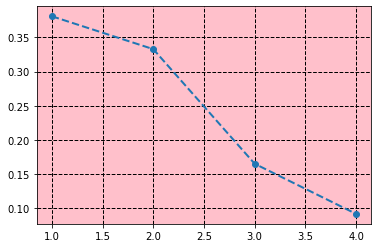

In [88]:
import matplotlib.pyplot as plt
plt.plot( 'PCA', 'Eigen_Values', data=a, linestyle='--', marker='o',linewidth=2)
ax = plt.axes()
  
ax.set_facecolor("Pink")
plt.grid(color='black', linestyle='--', linewidth=1)

plt.show()
